<a href="https://colab.research.google.com/github/sageh9120/MSSP-6070/blob/main/MSSP_607_Case_Study_Report_Assignment_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

--- Analysis Results ---
1. Mean Housing Price: $180,921.20
   Standard Deviation of Housing Price: $79,442.50
-------------------------


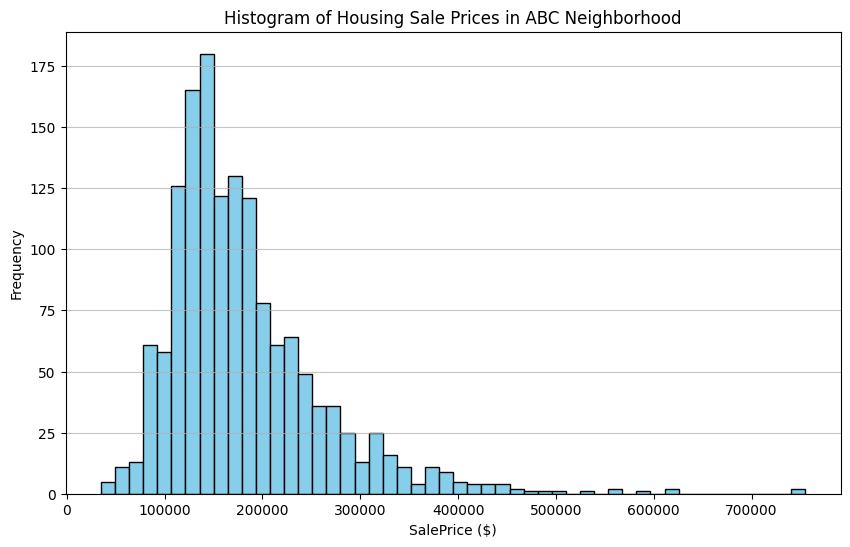

3. Outlier Analysis (SalePrice):
   Identified Outliers (Z-Score > 3): 22 homes
   Indices of Z-Score Outliers: [58, 178, 185, 349, 389, 440, 473, 496, 527, 591, 664, 691, 769, 798, 803, 898, 1046, 1142, 1169, 1182, 1243, 1373]
   Identified Outliers (IQR Method): 61 homes
   IQR Upper Bound: $340,037.50
   IQR Lower Bound: $3,937.50

   Example Handling (Removal): Removed 61 outliers. Remaining samples: 1399
   Example Handling (Capping): Capped max price at $340,037.50. New Mean: $177,331.53
-------------------------
--- End of Script ---


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset
try:
    df = pd.read_csv('HousingPrices.csv')
except FileNotFoundError:
    print("Error: HousingPrices.csv not found. Please ensure the file is in the current directory.")
    exit()

# 1. Mean and Standard Deviation of the price of housing (SalePrice)
mean_price = df['SalePrice'].mean()
std_price = df['SalePrice'].std()

print("--- Analysis Results ---")
print(f"1. Mean Housing Price: ${mean_price:,.2f}")
print(f"   Standard Deviation of Housing Price: ${std_price:,.2f}")
print("-" * 25)

# 2. Generate a histogram of the housing price
plt.figure(figsize=(10, 6))
plt.hist(df['SalePrice'], bins=50, color='skyblue', edgecolor='black')
plt.title('Histogram of Housing Sale Prices in ABC Neighborhood')
plt.xlabel('SalePrice ($)')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()

# 3. Outlier Detection and Handling (using Z-score and IQR methods)

# Using the Z-Score method for identification
z_scores = np.abs((df['SalePrice'] - mean_price) / std_price)
outlier_z_score_count = (z_scores > 3).sum()
outlier_z_score_indices = df[z_scores > 3].index

print(f"3. Outlier Analysis (SalePrice):")
print(f"   Identified Outliers (Z-Score > 3): {outlier_z_score_count} homes")
if outlier_z_score_count > 0:
    print(f"   Indices of Z-Score Outliers: {list(outlier_z_score_indices)}")

# Using the IQR method for identification
Q1 = df['SalePrice'].quantile(0.25)
Q3 = df['SalePrice'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outlier_iqr_count = df[(df['SalePrice'] < lower_bound) | (df['SalePrice'] > upper_bound)].shape[0]

print(f"   Identified Outliers (IQR Method): {outlier_iqr_count} homes")
print(f"   IQR Upper Bound: ${upper_bound:,.2f}")
print(f"   IQR Lower Bound: ${lower_bound:,.2f}")

# Handling Outliers (Demonstration for the report)
# Two common methods for handling (for the report's explanation):

# Method A: Removal (Demonstration)
df_cleaned_removed = df[~((df['SalePrice'] < lower_bound) | (df['SalePrice'] > upper_bound))].copy()
print(f"\n   Example Handling (Removal): Removed {outlier_iqr_count} outliers. Remaining samples: {len(df_cleaned_removed)}")

# Method B: Capping/Winsorizing (Demonstration)
df_cleaned_capped = df.copy()
df_cleaned_capped['SalePrice'] = np.where(
    df_cleaned_capped['SalePrice'] > upper_bound,
    upper_bound,
    df_cleaned_capped['SalePrice']
)
df_cleaned_capped['SalePrice'] = np.where(
    df_cleaned_capped['SalePrice'] < lower_bound,
    lower_bound,
    df_cleaned_capped['SalePrice']
)
print(f"   Example Handling (Capping): Capped max price at ${upper_bound:,.2f}. New Mean: ${df_cleaned_capped['SalePrice'].mean():,.2f}")

print("-" * 25)
print("--- End of Script ---")